In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
data = '''
# n_mol          AFQMC/HF                 AFQMC/CISD                 AFQMC/CCSD_PT               AFQMC/CCSD_PT2
    1    -149.152022 +/- 0.000423   -149.162094 +/- 0.000040    -149.161423 +/- 0.000039    -149.162372 +/- 0.000031
    2    -298.299978 +/- 0.001127   -298.321838 +/- 0.000135    -298.322834 +/- 0.00017     -298.324939 +/- 0.000139
    3    -447.452320 +/- 0.001238    -447.479828 +/- 0.000225    -447.484434 +/- 0.000201    -447.487364 +/- 0.000191
    4    -596.600622 +/- 0.001509   -596.635925 +/- 0.000337    -596.646125 +/- 0.000315    -596.649745 +/- 0.000236
    5    -745.749151 +/- 0.001632     -745.789001 +/- 0.000370    -745.806030 +/- 0.000337    -745.811494 +/- 0.000341
'''

In [28]:
n = []
afqmc_hf = []
afqmc_ci = []
afqmc_pt = []
afqmc_pt2 = []
afqmc_hf_err = []
afqmc_ci_err = []
afqmc_pt_err = []
afqmc_pt2_err = []
for lines in data.splitlines():
    if not lines.startswith('#') and len(lines) > 0:
        parts = lines.split()
        n = np.hstack((n,int(parts[0])))
        afqmc_hf = np.hstack((afqmc_hf,float(parts[1])/int(parts[0])))
        afqmc_hf_err = np.hstack((afqmc_hf_err,float(parts[3])/int(parts[0])))
        afqmc_ci = np.hstack((afqmc_ci,float(parts[4])/int(parts[0])))
        afqmc_ci_err = np.hstack((afqmc_ci_err,float(parts[6])/int(parts[0])))
        afqmc_pt = np.hstack((afqmc_pt,float(parts[7])/int(parts[0])))
        afqmc_pt_err = np.hstack((afqmc_pt_err,float(parts[9])/int(parts[0])))
        afqmc_pt2 = np.hstack((afqmc_pt2,float(parts[10])/int(parts[0])))
        afqmc_pt2_err = np.hstack((afqmc_pt2_err,float(parts[12])/int(parts[0])))

# afqmc_hf = np.array([-149.152022]*len(n))
# afqmc_hf_err = np.array([0.000423]*len(n))
ref = np.array([-149.16295032]*len(n))

In [29]:
print('  N   \t   FCI   \t \t  AFQMC/HF \t \t AFQMC/CISD \t \t \t AFQMC/CCSD_PT \t \t  \t AFQMC/CCSD_PT2')
for i,m in enumerate(n):
    print(f"  {int(m)} \t {ref[i]:.6f} \t {afqmc_hf[i]:.6f} +/- {afqmc_hf_err[i]:.6f} \t {afqmc_ci[i]:.6f} +/- {afqmc_ci_err[i]:.6f} \t {afqmc_pt[i]:.6f} +/- {afqmc_pt_err[i]:.6f} \t {afqmc_pt2[i]:.6f} +/- {afqmc_pt2_err[i]:.6f}")

  N   	   FCI   	 	  AFQMC/HF 	 	 AFQMC/CISD 	 	 	 AFQMC/CCSD_PT 	 	  	 AFQMC/CCSD_PT2
  1 	 -149.162950 	 -149.152022 +/- 0.000423 	 -149.162094 +/- 0.000040 	 -149.161423 +/- 0.000039 	 -149.162372 +/- 0.000031
  2 	 -149.162950 	 -149.149989 +/- 0.000563 	 -149.160919 +/- 0.000068 	 -149.161417 +/- 0.000085 	 -149.162469 +/- 0.000069
  3 	 -149.162950 	 -149.150773 +/- 0.000413 	 -149.159943 +/- 0.000075 	 -149.161478 +/- 0.000067 	 -149.162455 +/- 0.000064
  4 	 -149.162950 	 -149.150156 +/- 0.000377 	 -149.158981 +/- 0.000084 	 -149.161531 +/- 0.000079 	 -149.162436 +/- 0.000059
  5 	 -149.162950 	 -149.149830 +/- 0.000326 	 -149.157800 +/- 0.000074 	 -149.161206 +/- 0.000067 	 -149.162299 +/- 0.000068


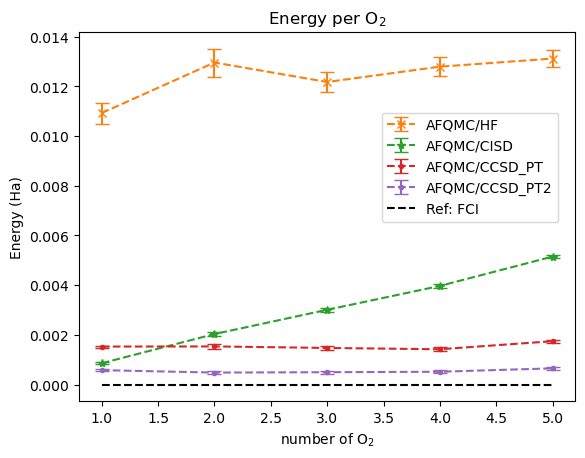

In [39]:
plt.errorbar(n,afqmc_hf-ref,yerr=afqmc_hf_err,fmt='x--', capsize=5, color='C1', label='AFQMC/HF')
plt.errorbar(n,afqmc_ci-ref,yerr=afqmc_ci_err,fmt='*--', capsize=5, color='C2', label='AFQMC/CISD')
plt.errorbar(n,afqmc_pt-ref,yerr=afqmc_pt_err,fmt='.--', capsize=5, color='C3', label='AFQMC/CCSD_PT')
plt.errorbar(n,afqmc_pt2-ref,yerr=afqmc_pt2_err,fmt='.--', capsize=5, color='C4', label='AFQMC/CCSD_PT2')
plt.plot(n,ref-ref,'--',color='black', label='Ref: FCI')
plt.xlabel('number of O$_2$')
plt.ylabel('Energy (Ha)')
plt.title('Energy per O$_2$')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['AFQMC/HF', 'AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: FCI']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels, bbox_to_anchor=(0.98, 0.8)) #loc='upper left')
plt.show()